# Union-Find / Disjoint Sets

In [ ]:
class UnionFind:
    def __init__(self, n):
        self.par = {}
        self.rank = {}

        for i in range(1, n + 1):
            self.par[i] = i
            self.rank[i] = 0
    
    # Find parent of n, with path compression.
    def find(self, n):
        p = self.par[n]
        while p != self.par[p]:
            self.par[p] = self.par[self.par[p]]
            p = self.par[p]
        return p

    # Union by height / rank.
    # Return false if already connected, true otherwise.
    def union(self, n1, n2):
        p1, p2 = self.find(n1), self.find(n2)
        if p1 == p2:
            return False
        
        if self.rank[p1] > self.rank[p2]:
            self.par[p2] = p1
        elif self.rank[p1] < self.rank[p2]:
            self.par[p1] = p2
        else:
            self.par[p1] = p2
            self.rank[p2] += 1
        return True

684. Redundant Connection
Solved
Medium
Topics
premium lock icon
Companies
In this problem, a tree is an undirected graph that is connected and has no cycles.

You are given a graph that started as a tree with n nodes labeled from 1 to n, with one additional edge added. The added edge has two different vertices chosen from 1 to n, and was not an edge that already existed. The graph is represented as an array edges of length n where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the graph.

Return an edge that can be removed so that the resulting graph is a tree of n nodes. If there are multiple answers, return the answer that occurs last in the input.

 

Example 1:

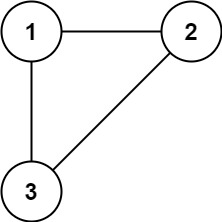

Input: edges = [[1,2],[1,3],[2,3]]
Output: [2,3]
Example 2:

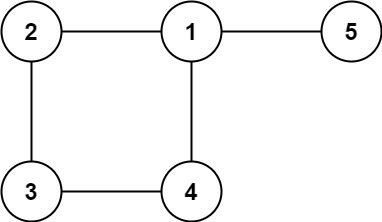

Input: edges = [[1,2],[2,3],[3,4],[1,4],[1,5]]
Output: [1,4]
 

Constraints:

n == edges.length
3 <= n <= 1000
edges[i].length == 2
1 <= ai < bi <= edges.length
ai != bi
There are no repeated edges.
The given graph is connected.

In [1]:
class Solution(object):
    def findRedundantConnection(self, edges):
        """
        :type edges: List[List[int]]
        :rtype: List[int]
        """
        par = [i for i in range(len(edges)+1)]
        height = [0 for i in range(len(edges)+1)]

        def Find(n):
            p = par[n]
            while p != par[p]:
                par[p] = par[par[p]]
                p = par[p]
            return p
        
        def Union(n1,n2):
            p1,p2 = Find(n1),Find(n2)

            if p1 == p2:
                return False

            if height[p1] < height[p2]:
                par[p1] = p2
                height[p2] +=1
            else:
                par[p2] = p1
                height[p1] += 1
            
            return True

        for n1,n2 in edges:
            if not Union(n1,n2):
                return [n1,n2]




Number of Connected Components in an Undirected Graph
Solved 
There is an undirected graph with n nodes. There is also an edges array, where edges[i] = [a, b] means that there is an edge between node a and node b in the graph.

The nodes are numbered from 0 to n - 1.

Return the total number of connected components in that graph.

Example 1:

Input:
n=3
edges=[[0,1], [0,2]]

Output:
1
Example 2:

Input:
n=6
edges=[[0,1], [1,2], [2,3], [4,5]]

Output:
2
Constraints:

1 <= n <= 100
0 <= edges.length <= n * (n - 1) / 2

In [3]:
class Solution:
    def countComponents(self, C, edges):
        par = [i for i in range(C+1)]
        height = [0 for i in range(C+1)]

        def Find(n):
            p = par[n]
            while p != par[p]:
                par[p] = par[par[p]]
                p = par[p]
            return p
        
        def Union(n1,n2):
            p1,p2 = Find(n1),Find(n2)

            if p1 == p2:
                return False

            if height[p1] < height[p2]:
                par[p1] = p2
                height[p2] +=1
            else:
                par[p2] = p1
                height[p1] += 1
            
            return True
        count = C
        for n1,n2 in edges:
            if Union(n1,n2):
                count -= 1
        return count
